In [1]:
from initial_data_wrangling import load_geojson
from shapely import Point
import geopandas as gp

/home/sean/code/study-hard/renewable_energy/venv/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [12]:
PROJ_M = 3857  # Mercator projection in meters
PROJ_GEO = 4326  # Geodetic projection
m_per_mile = 1609.34  # meters/mile

In [2]:
geo = load_geojson()
geo_m = geo.to_crs(PROJ_M)

68
Index(['OBJECTID', 'Shape_Length', 'Shape_Area', 'Name', 'CODE', 'CREATEDBY',
       'CREATEDDATE', 'UPDATEDBY', 'DOCYR', 'DOCNO', 'DOCDATE', 'SUBJECT',
       'UPDATEDATE', 'GlobalID', 'geometry'],
      dtype='object')


In [3]:
geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
geo_m.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
buffered = geo_m.buffer(50 * m_per_mile).to_crs(4326)
boundary = gp.GeoSeries(buffered.unary_union).boundary

In [8]:
power_plants = gp.GeoSeries(
    Point(-115.61667, 33.1633)  # Salton Sea Geothermal
)

<Axes: >

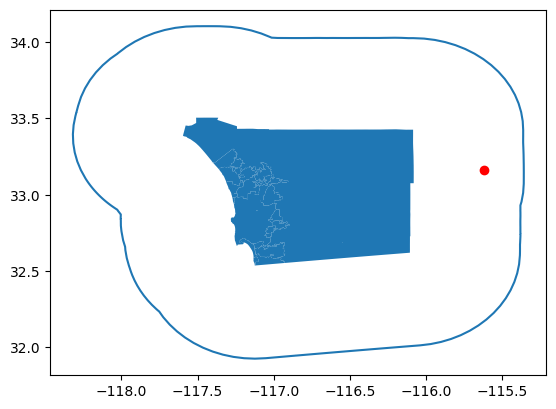

In [9]:
base = geo.plot()
base = boundary.plot(ax=base)
power_plants.plot(color='red', ax=base)